In [1]:
import dill
import pandas as pd
from tqdm import tqdm
import sys
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import pyLDAvis.sklearn
import matplotlib.pyplot

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../scripts')

import twitter
import text_analysis

andrew_yang_tweets = dill.load(open('../scrapped_data/twitter-data/yang-tweets.pkd', 'rb'))

/home/frank/.anaconda3/envs/tdi-capstone-notebook/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


# Andrew Yang

In [2]:
hashtags = [tweet.entities['hashtags'] for tweet in andrew_yang_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

In [3]:
counts = dict()

for x in set(hashtag_counts):
    counts[x] = hashtag_counts.count(x)

In [4]:
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

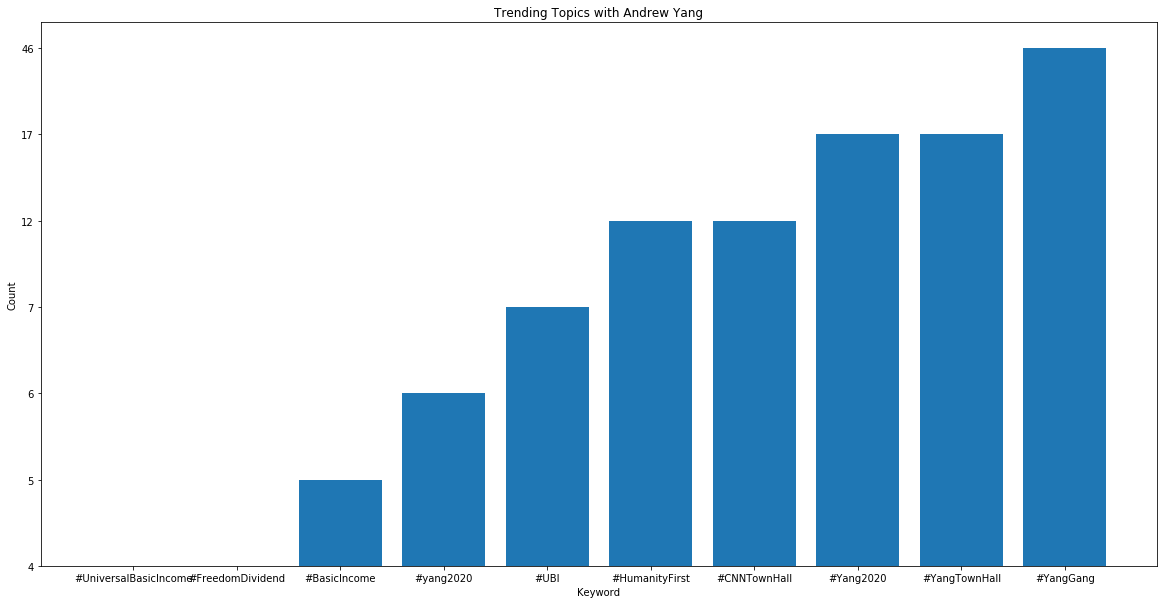

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Andrew Yang")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [7]:
text = twitter.Tweets(andrew_yang_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph(save_as='../pyldavis-dashboards/yang.html')

100%|██████████| 3199/3199 [00:00<00:00, 6956.75it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      161.771072  183.388031       1        1  22.402778
0       81.595718 -173.166901       2        1  12.239760
5      -20.627199  246.761261       3        1  11.024460
3      -92.392044   90.482666       4        1   9.929136
4      209.615402  -30.967953       5        1   9.806542
1       63.501682   49.436142       6        1   8.893707
6     -234.880203  -26.769245       7        1   7.795252
9     -228.881424  180.349777       8        1   7.338907
8     -135.146866 -204.481384       9        1   6.015609
7      -49.798038  -64.816620      10        1   4.553850, topic_info=     Category        Freq           Term       Total  loglift  logprob
2444  Default  382.000000         thanks  382.000000  30.0000  30.0000
2443  Default  301.000000          thank  301.000000  29.0000  29.0000
2143  Default  440.000000             rt  440.000000  28.0000  28.0000
217   Default  258.000000  andrewyangvfa  258.000000  27.0000  27.0000
1232  Default  110.000000         income  110.000000  26.0000  26.0000
...       ...         ...            ...         ...      ...      ...
1876  Topic10    8.930944         policy   33.505495   1.7670  -4.8119
1460  Topic10    9.736555           live   52.115447   1.4116  -4.7255
1686  Topic10   11.394965            new  197.962700   0.2343  -4.5682
770   Topic10    6.676043         dollar   21.463310   1.9214  -5.1029
497   Topic10    6.473592         choice   20.327146   1.9450  -5.1337

[486 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         1  0.997013       000
3         2  0.060957        10
3         7  0.914350        10
4         1  0.983963       100
10        1  0.943637        12
...     ...       ...       ...
2721      7  0.076800  yanggang
2729      1  0.971386      year
2729     10  0.026735      year
2732      4  0.986897       yes
2735      1  0.968049     young

[616 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 6, 4, 5, 2, 7, 10, 9, 8])

# Donald Trump

In [8]:
trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_personal_tweets.pkd', 'rb'))

In [9]:
hashtags = [tweet.entities['hashtags'] for tweet in trump_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

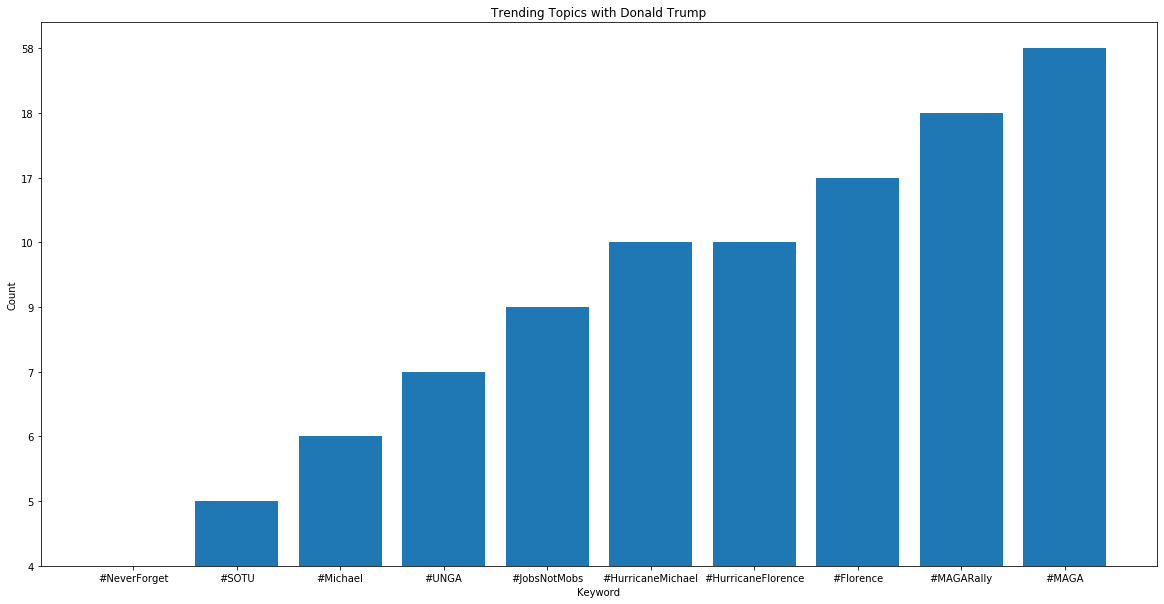

In [10]:
counts = dict()

for x in set(hashtag_counts):
    counts[x] = hashtag_counts.count(x)
    
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Donald Trump")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [12]:
text = twitter.Tweets(trump_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph(save_as='../pyldavis-dashboards/trump.html')

100%|██████████| 3192/3192 [00:01<00:00, 1879.05it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      144.403214 -100.983841       1        1  21.529886
9     -117.251999   22.339933       2        1  17.055889
0        4.779493  -61.213921       3        1  12.377429
1      -97.909622 -104.588570       4        1  11.209374
7      -43.149509  148.860794       5        1   9.384574
6       92.504387    1.434836       6        1   8.536175
8       91.826889  125.712494       7        1   8.133569
4       -5.517041   46.083153       8        1   6.134699
5      196.346497   35.595646       9        1   3.569952
2       34.618763 -168.451370      10        1   2.068452, topic_info=     Category        Freq               Term       Total  loglift  logprob
1359  Default  677.000000              great  677.000000  30.0000  30.0000
3035  Default  212.000000              thank  212.000000  29.0000  29.0000
2665  Default  520.000000                 rt  520.000000  28.0000  28.0000
3240  Default  235.000000               vote  235.000000  27.0000  27.0000
421   Default  320.000000             border  320.000000  26.0000  26.0000
...       ...         ...                ...         ...      ...      ...
1504  Topic10    7.232738  hurricaneflorence   11.616493   3.4046  -4.8228
2141  Topic10    7.069228           obstruct   13.895936   3.2025  -4.8456
1619  Topic10    5.832259            involve   12.555456   3.1116  -5.0380
3142  Topic10    5.218084            twitter    9.406779   3.2891  -5.1493
2308  Topic10    5.082919         pittsburgh    7.970680   3.4285  -5.1755

[544 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.157748     00
0         6  0.788739     00
1         2  0.405380    000
1         4  0.579115    000
12        2  0.965974     13
...     ...       ...    ...
3362      2  0.140475   year
3362      3  0.228272   year
3362      8  0.351188   year
3367      3  0.989058   york
3369      9  0.907954  young

[787 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 1, 2, 8, 7, 9, 5, 6, 3])

# Bernie Sanders

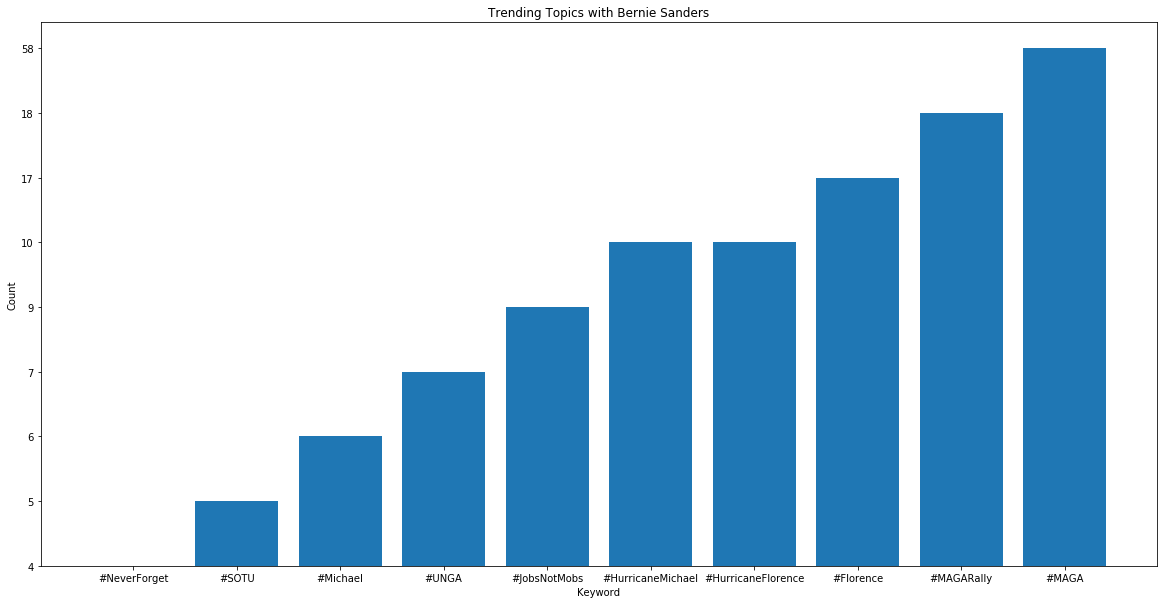

In [13]:
sanders_tweet = dill.load(open('../scrapped_data/twitter-data/sanders-tweets.pkd', 'rb'))

hashtags = [tweet.entities['hashtags'] for tweet in trump_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

counts = dict()

for x in set(hashtag_counts):
    counts[x] = hashtag_counts.count(x)
    
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Bernie Sanders")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [ ]:
text = twitter.Tweets(sanders_tweet)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph(save_as='../pyldavis-dashboards/sanders.html')

100%|██████████| 3199/3199 [00:01<00:00, 2077.28it/s]
